In [201]:
import random

In [202]:
bracelet = ('crit','spec','empty','empty','empty')
locked_status = (1, 1, 0, 0, 0)
remaining_attempts = 4

In [203]:
def weighted_random_selection(possible_line):
    # Extract the keys and their corresponding weights
    keys = list(possible_line.keys())
    weights = list(possible_line.values())

    # Use random.choices() to select a key based on the provided weights
    selected_key = random.choices(keys, weights=weights, k=1)[0]

    return selected_key

In [204]:
def select_line(bracelet):
    possible_line = {'main_stat':35,'combat_stat':35,'special_effect':30}
    main_stat = {'vit':1,'str':1}
    combat_stat = {'crit':1,'spec':1,'dom':1,'swift':1,'endu':1,'expert':1}
    special_effect = {'trash':92.79383,'precise':1.2353,'raid':1.2353,'superiority':1.2353,'ambush/battle':1.2353, 'circulate':0.75499,'hammer':0.75499,'fervor':0.75499}
    category_counts = {'main_stat': 0, 'combat_stat': 0}
    
    for item in bracelet:
        if item in main_stat:
            category_counts['main_stat'] += 1
        elif item in combat_stat:
            category_counts['combat_stat'] += 1
            
    for category, count in category_counts.items():
        if count >= 2:
            possible_line[category] = 0
            
    # First-tier selection: choose the category
    category = weighted_random_selection(possible_line)

    # Second-tier selection: choose the specific line based on the category
    if category == 'main_stat':
        main_stat = {k: v for k, v in main_stat.items() if k not in bracelet}
        return 'main_stat', weighted_random_selection(main_stat)
    elif category == 'combat_stat':
        combat_stat = {k: v for k, v in combat_stat.items() if k not in bracelet}
        return 'combat_stat', weighted_random_selection(combat_stat)
    elif category == 'special_effect':
        special_effect = {k: v for k, v in special_effect.items() if k not in bracelet or k == 'trash'}
        return 'special_effect', weighted_random_selection(special_effect)

# Example usage
category, line = select_line(bracelet)
print(f"Selected category: {category}, Selected line: {line}")


Selected category: special_effect, Selected line: trash


In [205]:
def bracelet_reroll_ancient(bracelet, locked_status, remaining_attempts, need_to_print):
    # simulates the reroll event for ancient bracelet
    # inputs: 
    #   bracelet: tuple representing the initial state of the bracelet. 
    #   locked_status: tuple representing the initial locked stats of the bracelet.
    #   remaining_attempts: integer representing the amount of attemps left for this bracelet.
    #   weights: dictionary for available stats(key) and their weights(value
    #   need_to_print: boolean representing if you want to print the result at the end. 
    
    # Convert the immutable tuple to an mutable list for bracelet and locked_status
    bracelet = list(bracelet)
    locked_status = list(locked_status)

    # loop through remaining attempts
    while remaining_attempts > 0:
        # Iterate over each slot in the bracelet
        for i in range(len(bracelet)):
            # Mark the slot as 'empty' if it's not in the locked_values
            if locked_status[i] != 1:
                bracelet[i] = 'empty'

        # loop through each slot
        for i in range(len(bracelet)):
            if not locked_status[i]:

                [ _ , chosen_stat ] = select_line(bracelet)

                bracelet[i] = chosen_stat

                # Lock the slot if special_good is chosen
                if chosen_stat in special_effect.keys() and chosen_stat != 'trash':
                    locked_status[i] = 1

        remaining_attempts -= 1
        
    # Print the result before returning
    if need_to_print:
        print("Result Bracelet:", bracelet)
        print("Locked Status:", locked_status)

    # Convert back to tuples before returning
    return tuple(bracelet), tuple(locked_status), sum(locked_status)  # Return the bracelet, locked status, and count of locked slots

In [206]:
# example of running the simulation on ancient bracelet once
[_,_,locked_slots] = bracelet_reroll_ancient(bracelet, locked_status, remaining_attempts, 1)
print("Locked Slots:", locked_slots)

Result Bracelet: ['crit', 'spec', 'trash', 'trash', 'superiority']
Locked Status: [1, 1, 0, 0, 1]
Locked Slots: 3


In [207]:
def run_simulation_and_plot_ancient(runs, initial_bracelet, initial_locked_status, remaining_attempts):
    # Run the simulation 'runs' times and record the number of locked slots
    locked_slots_counts = []
    for _ in range(runs):
        _, _, locked_slots = bracelet_reroll_ancient(initial_bracelet, initial_locked_status, remaining_attempts, 0)
        locked_slots_counts.append(locked_slots)

    # Plotting the histogram
    n, bins, patches = plt.hist(locked_slots_counts, bins=range(2, 7), align='left', color='blue', edgecolor='black')

    # Adding count annotations on each bar
    for i in range(len(n)):
        plt.annotate(str(int(n[i])), xy=(bins[i] + 0.1, n[i]), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.xlabel('Number of Locked Slots')
    plt.ylabel('Frequency')
    plt.title('Histogram of Locked Slots Over ' + str(runs) + ' Runs')
    plt.xticks(range(2, 6))
    plt.show()

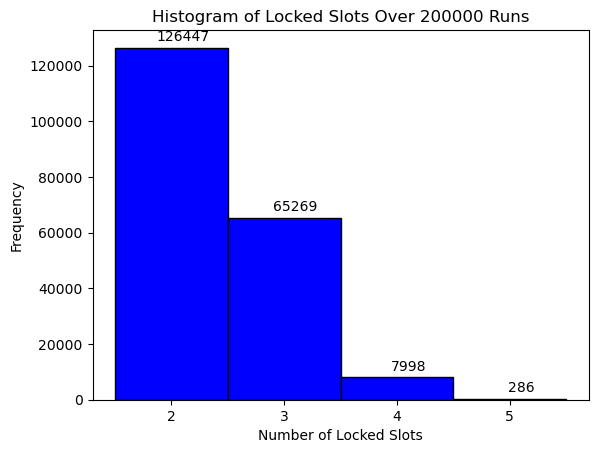

In [210]:
run_simulation_and_plot_ancient(200000, bracelet, locked_status, remaining_attempts)